<a href="https://colab.research.google.com/github/OwenGeeAndre/DataScience_MachineLearning/blob/main/5_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='7'><b>Practical Example</font>

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

# Loading the Data

In [4]:
df = pd.read_csv('/content/1.04.+Real-life+example.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Exploration & Preprocessing

In [5]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
df.drop(columns="Model",inplace=True)

## Dealing with missing values

In [7]:
df.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [8]:
df_no_mv = df.dropna(axis=0)

## Dealing with Outliers

<Axes: xlabel='Price', ylabel='Count'>

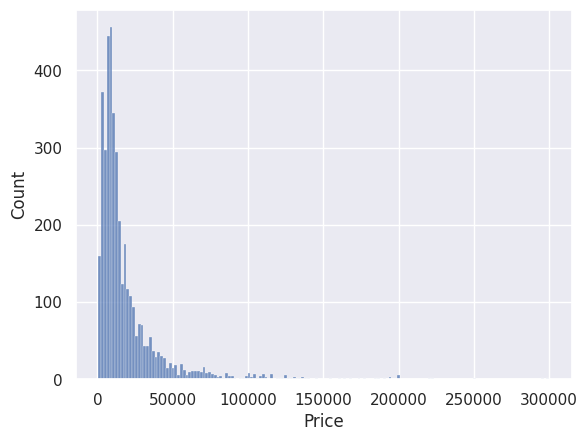

In [9]:
sns.histplot(df_no_mv['Price'])

In [10]:
q = df_no_mv["Price"].quantile(0.99)
df_1 = df_no_mv[df_no_mv["Price"]<q]

<Axes: xlabel='Price', ylabel='Count'>

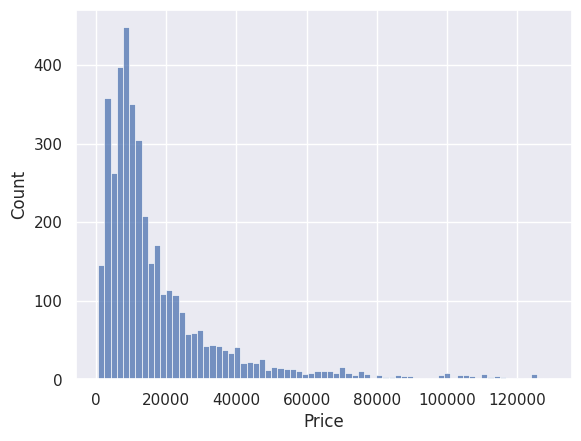

In [11]:
sns.histplot(df_1['Price'])

In [12]:
q = df_1["Mileage"].quantile(0.99)
df_2 = df_1[df_1["Mileage"]<q]

<Axes: xlabel='Mileage', ylabel='Count'>

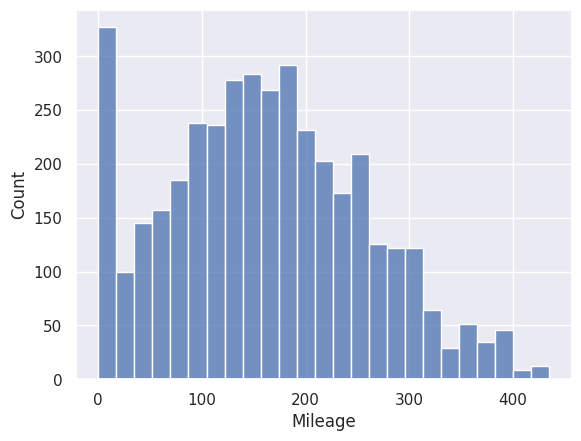

In [13]:
sns.histplot(df_2['Mileage'])

> Engine values should not be over 6.5

<Axes: xlabel='EngineV', ylabel='Count'>

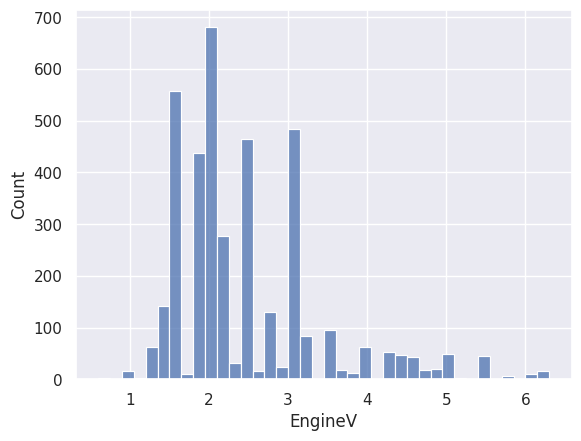

In [14]:
df_3 = df_2[df_2["EngineV"]<6.5]

sns.histplot(df_3['EngineV'])

<Axes: xlabel='Year', ylabel='Count'>

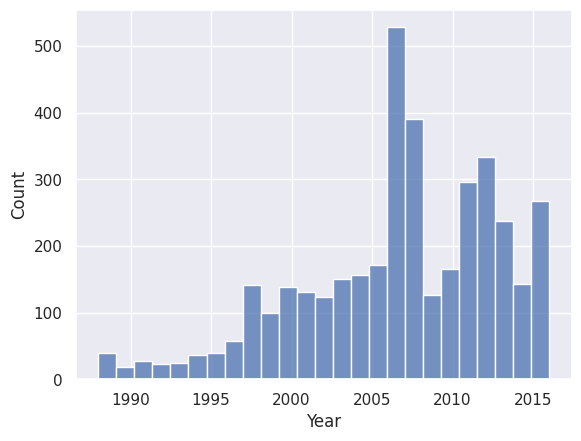

In [15]:
q = df_3["Year"].quantile(0.01)
df_4 = df_3[df_3["Year"]>q]

sns.histplot(df_4['Year'])

In [16]:
df_cleaned = df_4.reset_index(drop=True)

# Checking the OLS Assumptions

> 'Price'. 'Year', 'EngineV', and 'Mileage' are those that are
likely to be more challenging and cause us more problems

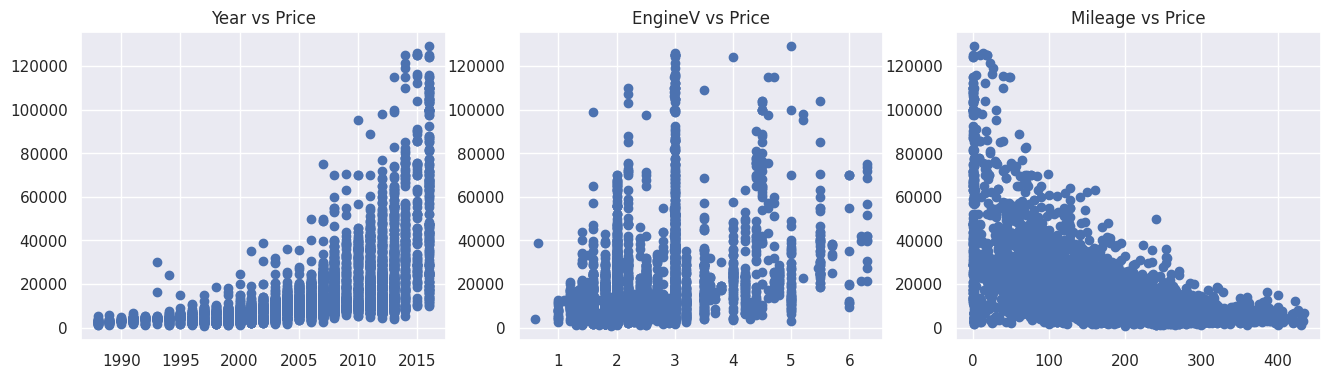

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.scatter(df_cleaned['Year'], df_cleaned['Price'])
ax1.set_title('Year vs Price')

ax2.scatter(df_cleaned['EngineV'], df_cleaned['Price'])
ax2.set_title('EngineV vs Price')

ax3.scatter(df_cleaned['Mileage'], df_cleaned['Price'])
ax3.set_title('Mileage vs Price');

* We are not having linear relationships

* We should first transform one or more variables

* Price is also not normally distributed

* Log transformations are good esp when facing exponential scatterplots

### Relaxing the assumptions

In [18]:
df_cleaned["log_price"] = np.log(df_cleaned["Price"])

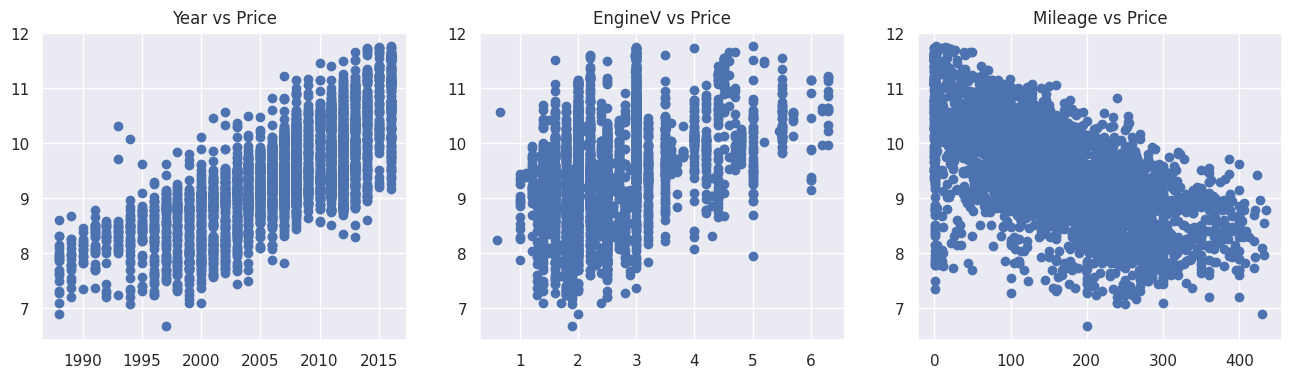

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.scatter(df_cleaned['Year'], df_cleaned['log_price'])
ax1.set_title('Year vs Price')

ax2.scatter(df_cleaned['EngineV'], df_cleaned['log_price'])
ax2.set_title('EngineV vs Price')

ax3.scatter(df_cleaned['Mileage'], df_cleaned['log_price'])
ax3.set_title('Mileage vs Price');

In [20]:
df_cleaned.drop(columns=["Price"],inplace=True)

## Check for Multicollinearity

* One of the best ways to check for multicollinearity
is through VIF (variance inflation factor)

In [21]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

In [22]:
variables =df_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [23]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [24]:
df_no_multi = df_cleaned.drop(columns=["Year"])

# Create dummy variables

In [25]:
data_dummies = pd.get_dummies(df_no_multi, drop_first=True)

In [26]:
data_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange columns

In [27]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [28]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [29]:
data_processed = data_dummies[cols]

# Linear Regression Model

## Declare the inputs and targets

In [30]:
target = data_processed["log_price"]
inputs = data_processed.drop(columns="log_price")

## Scale the data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [33]:
input_scaled = scaler.transform(inputs)

## Splitting the data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(input_scaled, target, test_size=0.2, random_state=42)

## Regression

In [36]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [37]:
y_pred = reg.predict(xtrain)

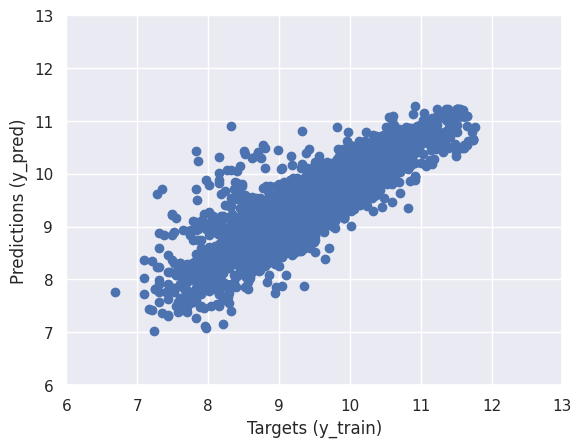

In [38]:
plt.scatter(ytrain, y_pred)
plt.xlabel("Targets (y_train)")
plt.ylabel("Predictions (y_pred)")
plt.xlim(6,13)
plt.ylim(6,13);

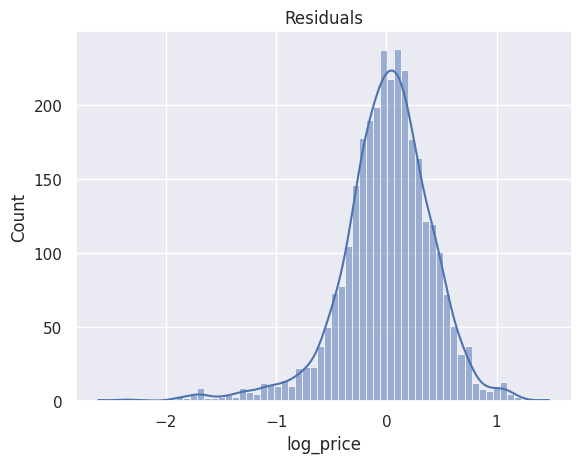

In [41]:
sns.histplot(ytrain-y_pred,kde=True)
plt.title("Residuals");

> There are certain observations for which
($y_{train} - y_{hat}$) is much lower than the mean
(a much higher price is predicted than is observed)

In [42]:
reg.score(xtrain,ytrain)

0.7546487921881218

## Finding weights and bias

In [43]:
reg.intercept_

np.float64(9.421003614148074)

In [45]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [48]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


# Testing

In [49]:
y_pred_test = reg.predict(xtest)

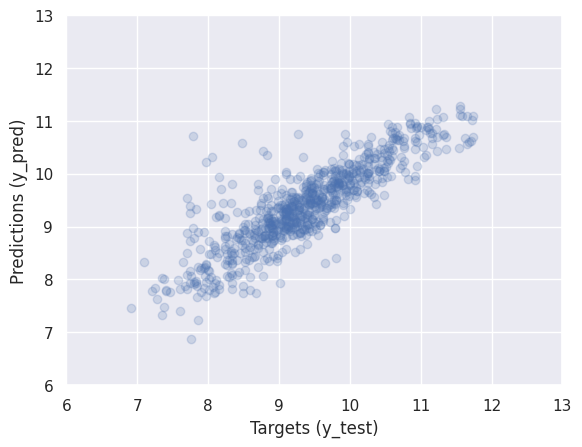

In [51]:
plt.scatter(ytest, y_pred_test, alpha=0.2)
plt.xlabel("Targets (y_test)")
plt.ylabel("Predictions (y_pred)")
plt.xlim(6,13)
plt.ylim(6,13);

In [52]:
df_pf = pd.DataFrame(np.exp(y_pred_test),columns=["Predictions"])
df_pf.head()

,Predictions
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [55]:
ytest = ytest.reset_index(drop=True)

In [56]:
df_pf["Target"] = np.exp(ytest)
df_pf

,Predictions,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [57]:
df_pf["Residuals"] = df_pf["Target"] - df_pf["Predictions"]

In [59]:
df_pf["Diff%"] = np.absolute(df_pf["Residuals"]/df_pf["Target"]*100)

In [60]:
df_pf

,Predictions,Target,Residuals,Diff%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [61]:
df_pf.describe()

,Predictions,Target,Residuals,Diff%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [70]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [71]:
df_pf.sort_values(by=["Diff%"])

,Predictions,Target,Residuals,Diff%
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
...,...,...,...,...
713,13941.93,2200.00,-11741.93,533.72
280,39469.51,4800.00,-34669.51,722.28
219,27632.40,2900.00,-24732.40,852.84
750,30076.59,3150.00,-26926.59,854.81
